## Lesson 1: Downloading Stock Data  
## Хичээл 1: Хувьцааны өгөгдөл татаж авах

Энэ хичээлд бид Python-ийн `yfinance` санг ашиглан хувьцааны үнийн мэдээллийг татаж авч, pandas dataframe-д хэрхэн оруулахыг сурах болно.  
In this lesson, we learn how to download stock price data using Python’s `yfinance` library and load it into a pandas dataframe.

In [5]:
import yfinance as yf      # Import the yfinance library – хувьцааны мэдээлэл татах сан
# Import pandas for data processing – өгөгдөл боловсруулах pandas сан
import pandas as pd

# Download historical stock data for Apple – Apple компанийн түүхэн үнэ татах
data = yf.download("AAPL", start="2024-01-01", end="2024-12-31")

# Display the first few rows – Эхний хэдэн мөрийг хэвлэх, сүүлийн 5 мөрийг харуулах print(data.tail(5))
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.290436  187.070083  182.553158  185.789453  82488700
2024-01-03  182.910507  184.528662  182.096461  182.880727  58414500
2024-01-04  180.587540  181.758954  179.565029  180.825785  71983600
2024-01-05  179.862823  181.431339  178.860172  180.666948  62303300
2024-01-08  184.210999  184.250716  180.180517  180.766224  59144500


## Lesson 2: Calculating Daily Returns  
## Хичээл 2: Өдөр тутмын өгөөжийг тооцоолох

Энэ хичээлээр хувьцааны хаалтын үнийн өөрчлөлт буюу өдөр тутмын өгөөжийг тооцоолох аргыг үзнэ. Өгөгдлийг боловсруулах үндсэн ойлголтуудыг авч үзнэ.  
In this lesson, we calculate daily returns based on closing prices and understand basic data processing concepts.

In [4]:
import yfinance as yf      # yfinance санг дуудаж байна
import pandas as pd        # pandas санг дуудаж өгөгдөл боловсруулахад ашиглана

# Download stock data – Хувьцааны өгөгдөл татаж авна
data = yf.download("AAPL", start="2024-01-01", end="2024-12-31")

# Calculate daily return – Өдөр тутмын өгөөжийг тооцоолно
data['Daily Return'] = data['Close'].pct_change()

# Show Close price and Daily Return – Хаалтын үнэ ба өгөөжийг харуулна
print(data[['Close', 'Daily Return']].head())

[*********************100%***********************]  1 of 1 completed

Price            Close Daily Return
Ticker            AAPL             
Date                               
2024-01-02  184.290436          NaN
2024-01-03  182.910507    -0.007488
2024-01-04  180.587540    -0.012700
2024-01-05  179.862823    -0.004013
2024-01-08  184.210999     0.024175


## Lesson 3: Plotting Closing Prices with Moving Averages  
## Хичээл 3: Хаалтын үнийн график болон шилжих дундаж зурж үзэх

Энэ хичээлд хувьцааны хаалтын үнийн график болон 5 болон 20 хоногийн шилжих дундажийг хэрхэн үүсгэж, matplotlib ашиглан дүрслэхийг судлах болно.  
In this lesson, we plot closing prices along with 5-day and 20-day moving averages using matplotlib for data visualization.

[*********************100%***********************]  1 of 1 completed


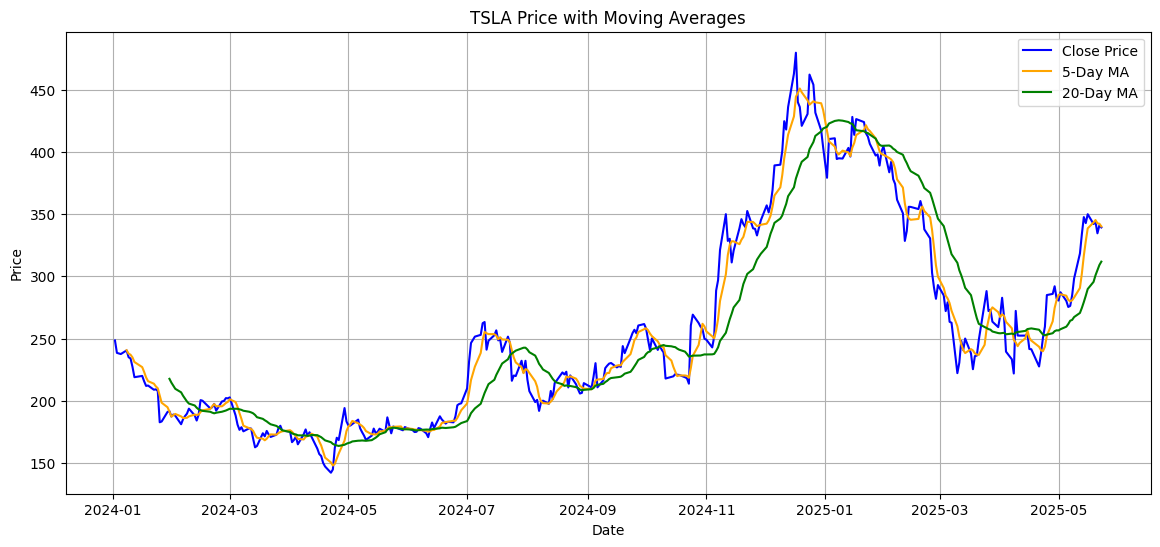

In [3]:
import yfinance as yf                  # yfinance ашиглан хувьцааны мэдээлэл татах
import pandas as pd                    # pandas ашиглан өгөгдөл боловсруулах
import matplotlib.pyplot as plt        # matplotlib ашиглан график зурах

# Download TSLA (Tesla) stock data – Tesla компанийн хувьцааны үнэ татах
data = yf.download("TSLA", start="2024-01-01", end="2025-05-24")

# 5-day moving average – 5 хоногийн дундаж үнэ тооцоолох
data['MA5'] = data['Close'].rolling(window=5).mean()

# 20-day moving average – 20 хоногийн дундаж үнэ тооцоолох
data['MA20'] = data['Close'].rolling(window=20).mean()

# Plotting the data – График зурах хэсэг
# Зургийн хэмжээ тохируулах
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price',
         color='blue')    # Хаалтын үнэ зурах
plt.plot(data['MA5'], label='5-Day MA',
         color='orange')       # 5 хоногийн дундаж
plt.plot(data['MA20'], label='20-Day MA',
         color='green')      # 20 хоногийн дундаж

plt.title('TSLA Price with Moving Averages')             # Графикийн гарчиг
plt.xlabel('Date')                                       # Х-тийн гарчиг
plt.ylabel('Price')                                      # Y-гийн гарчиг
plt.legend()                                             # Тэмдэглэгээ нэмэх
plt.grid(True)                                           # Сүлжээ нэмэх
plt.show()                                               # График гаргах

## Lesson 4: Volatility Analysis using Standard Deviation  
 		Learn how to calculate and visualize stock volatility using 20-day rolling standard deviation in Python.  
 		Python ашиглан хувьцааны үнийн 20 хоногийн хэлбэлзлийг (стандарт хазайлт) тооцож, график дээр үзүүлж сурна.

  		Тайлбар: 
		 Энэхүү хичээлээр хувьцааны үнийн хэлбэлзлийг (volatility) стандарт хазайлт (standard deviation) ашиглан тооцож, график зурна.
          Зорилго / Purpose of This Lesson
		  		•	A high SD means the stock price is very volatile (moves up and down a lot).
	        	•	Их стандарт хазайлт = хувьцааны үнэ маш их хэлбэлзэлтэй байна (эрсдэл өндөр).
				•	A high SD means the stock price is very volatile (moves up and down a lot).
				•	Бага стандарт хазайлт = хувьцааны үнэ тогтвортой, бага хэлбэлзэлтэй байна (эрсдэл багатай).

		# Daily return (өдрийн өгөөж) үндсэн дээр.  
					•	rolling(window=20) → Сүүлийн 20 өдрийн дундаж
					•	.std() → Тэр дундажийн стандарт хазайлтыг тооцно
					data['Volatility'] = data['Daily Return'].rolling(window=20).std()  

[*********************100%***********************]  1 of 1 completed


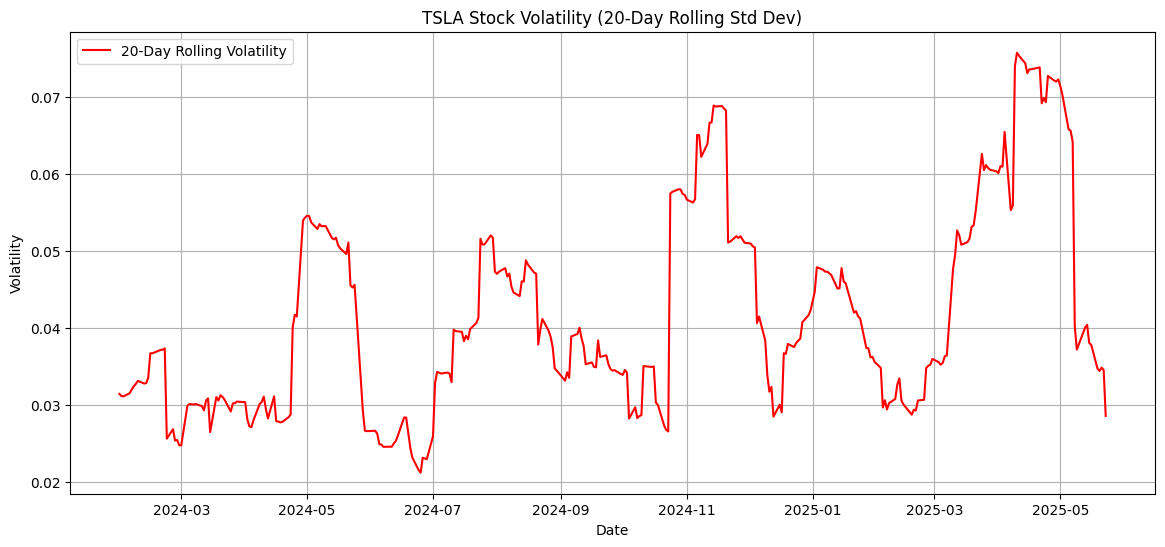

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Tesla stock data (TSLA)
data = yf.download("TSLA", start="2024-01-01", end="2025-05-24")

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Calculate rolling standard deviation (volatility)
# This is the 20-day rolling standard deviation of daily returns
data['Volatility'] = data['Daily Return'].rolling(window=20).std()

# Plot the volatility
plt.figure(figsize=(14, 6))
plt.plot(data['Volatility'], label='20-Day Rolling Volatility', color='red')
plt.title('TSLA Stock Volatility (20-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

## Lesson 5: Stock Correlation Analysis /Олон хувьцааны уялдааг харах үед ашиглана./
        Goal: Learn how to analyze the relationship between two stocks using correlation.
        Зорилго: Хоёр хувьцааны хоорондын хамаарлыг (correlation) хэрхэн тооцоолох, тайлбарлахыг сурна.

        Correlation measures the relationship between two stock price movements:
        Корреляци гэдэг нь хоёр хувьцааны үнэ хэр зэрэг хоорондоо хамааралтай хөдөлж байгааг хэмждэг үзүүлэлт юм:
	•	+1 → Хоёр хувьцаа адилхан чиглэлд хөдөлнө, Prices move in the same direction
	•	0 → Хамааралгүй, No relation
	•	–1 → Эсрэг чиглэлд хөдөлнө, Prices move in opposite directions

[**********************67%*******                ]  2 of 3 completed

[*********************100%***********************]  3 of 3 completed


Stock return correlation:
Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.555477  0.474957
MSFT    0.555477  1.000000  0.439817
TSLA    0.474957  0.439817  1.000000


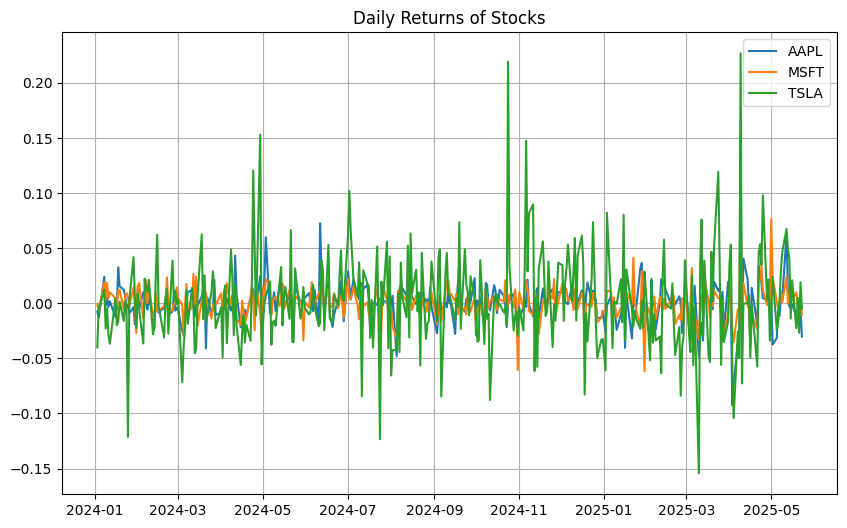

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 2. Татах хувьцааны нэрс (Apple, Microsoft, Tesla)
stocks = ['AAPL', 'MSFT', 'TSLA']

# 3. 2024 оноос хойших үнэ татах
data = yf.download(stocks, start="2024-01-01", end="2025-05-24")['Close']

# 4. Өдөр тутмын өгөөжийг тооцоолох
returns = data.pct_change()

# 5. Өгөөжийн correlation тооцоолох
correlation = returns.corr()

# 6. Correlation matrix-г хэвлэх
print("Stock return correlation:")
print(correlation)

# 7. Графикаар үзүүлэх
plt.figure(figsize=(10, 6))
plt.title("Daily Returns of Stocks")
for stock in stocks:
    plt.plot(returns[stock], label=stock)

plt.legend()
plt.grid(True)
plt.show()

## Lesson 5B
    Хоёр хувьцааны хоорондын уялдааг харах үед хэрэглэнэ.
    2x2 heatmap байна.


     Суралцах зүйлс / What you will learn
	1.	Correlation гэж юу вэ?
        – Хоёр хувьцааны өгөөж (returns) хэр зэрэг хоорондоо уялдаатай вэ гэдгийг хэмждэг.
        – +1: маш ижил чиглэлд хөдөлнө
        – -1: эсрэг чиглэлд хөдөлнө
        – 0: ямар ч хамааралгүй
	2.	Daily returns тооцоолох
        – pct_change() ашиглан өдөр бүрийн өгөөжийг гаргах.
	3.	Correlation matrix гаргах
        – pandas.DataFrame.corr() функцээр хоёр хувьцааны хоорондын хамаарлыг гаргана.
	4.	Heatmap зурах (Seaborn ашиглан)
        – sns.heatmap() ашиглан correlation matrix-ийг визуал хэлбэрээр харуулах.

    

[*********************100%***********************]  2 of 2 completed


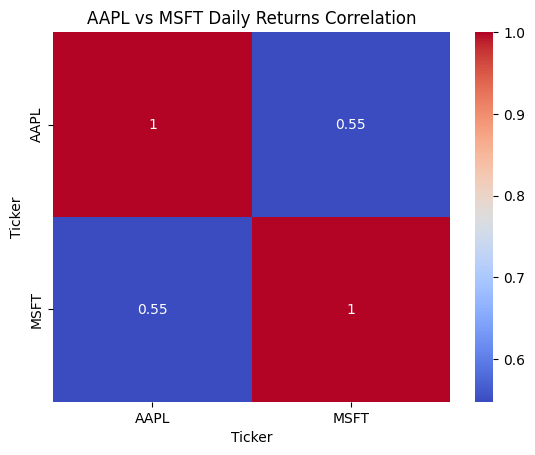

In [9]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Хувьцааны үнэ татах
stocks = ['AAPL', 'MSFT']
data = yf.download(stocks, start='2023-01-01', end='2023-12-31')['Close']

# 2. Өдөр тутмын өгөөж тооцоолох
returns = data.pct_change()

# 3. Correlation matrix гаргах
corr_matrix = returns.corr()

# 4. Heatmap зурж харуулах
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('AAPL vs MSFT Daily Returns Correlation')
plt.show()